In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

import missingno as msno # Eksik değer görselleştirme için harikadır

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Data Understanding

In [2]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df["Outcome"].sort_values()

28     0
29     0
30     0
752    0
756    0
      ..
9      1
11     1
13     1
14     1
15     1
Name: Outcome, Length: 768, dtype: int64

In [8]:
df["Outcome"].unique()

array([1, 0])

In [9]:
df["Outcome"].value_counts().unique()

array([500, 268])

In [10]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df["Insulin"].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

In [13]:
df["BloodPressure"].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64

# Data Cleaning

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
columns_to_check = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count / len(df)
    print(f"{col} : {zero_count} % {zero_percentage:.3f}")

Glucose : 5 % 0.651
BloodPressure : 35 % 4.557
SkinThickness : 227 % 29.557
Insulin : 374 % 48.698
BMI : 11 % 1.432


In [16]:
# 0 değerlerini NaN yapıyoruz (Hamilelik ve Outcome hariç)
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

In [17]:
# Estetik ayarlar
sns.set_theme(style="whitegrid", palette="muted")

# Keşifsel Veri Analizi (EDA)

**Hedef Değişken ve Korelasyon Analizi**

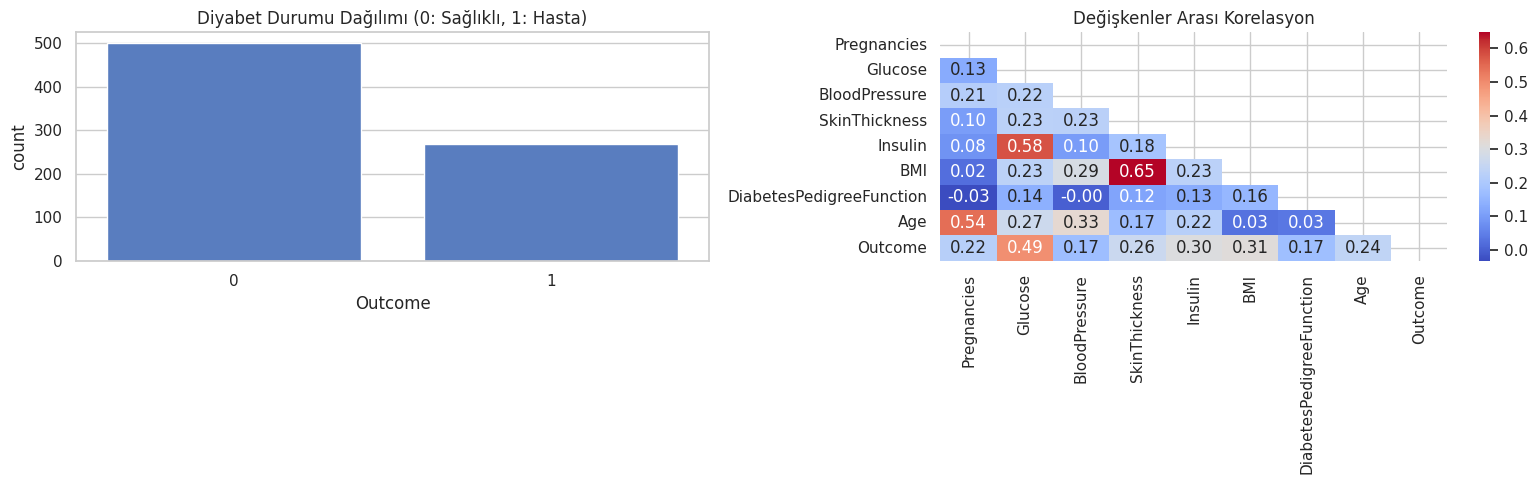

In [18]:
plt.figure(figsize=(16, 5))

# Sol Grafik: Hedef Değişken Dağılımı
plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=df)
plt.title('Diyabet Durumu Dağılımı (0: Sağlıklı, 1: Hasta)')

# Sağ Grafik: Korelasyon Isı Haritası
plt.subplot(1, 2, 2)
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) # Üst üçgeni gizle
sns.heatmap(df.corr(), annot=True, fmt='.2f', mask=mask, cmap='coolwarm')
plt.title('Değişkenler Arası Korelasyon')

plt.tight_layout()
plt.show()

**Dağılım Analizi (Histogram & KDE)**

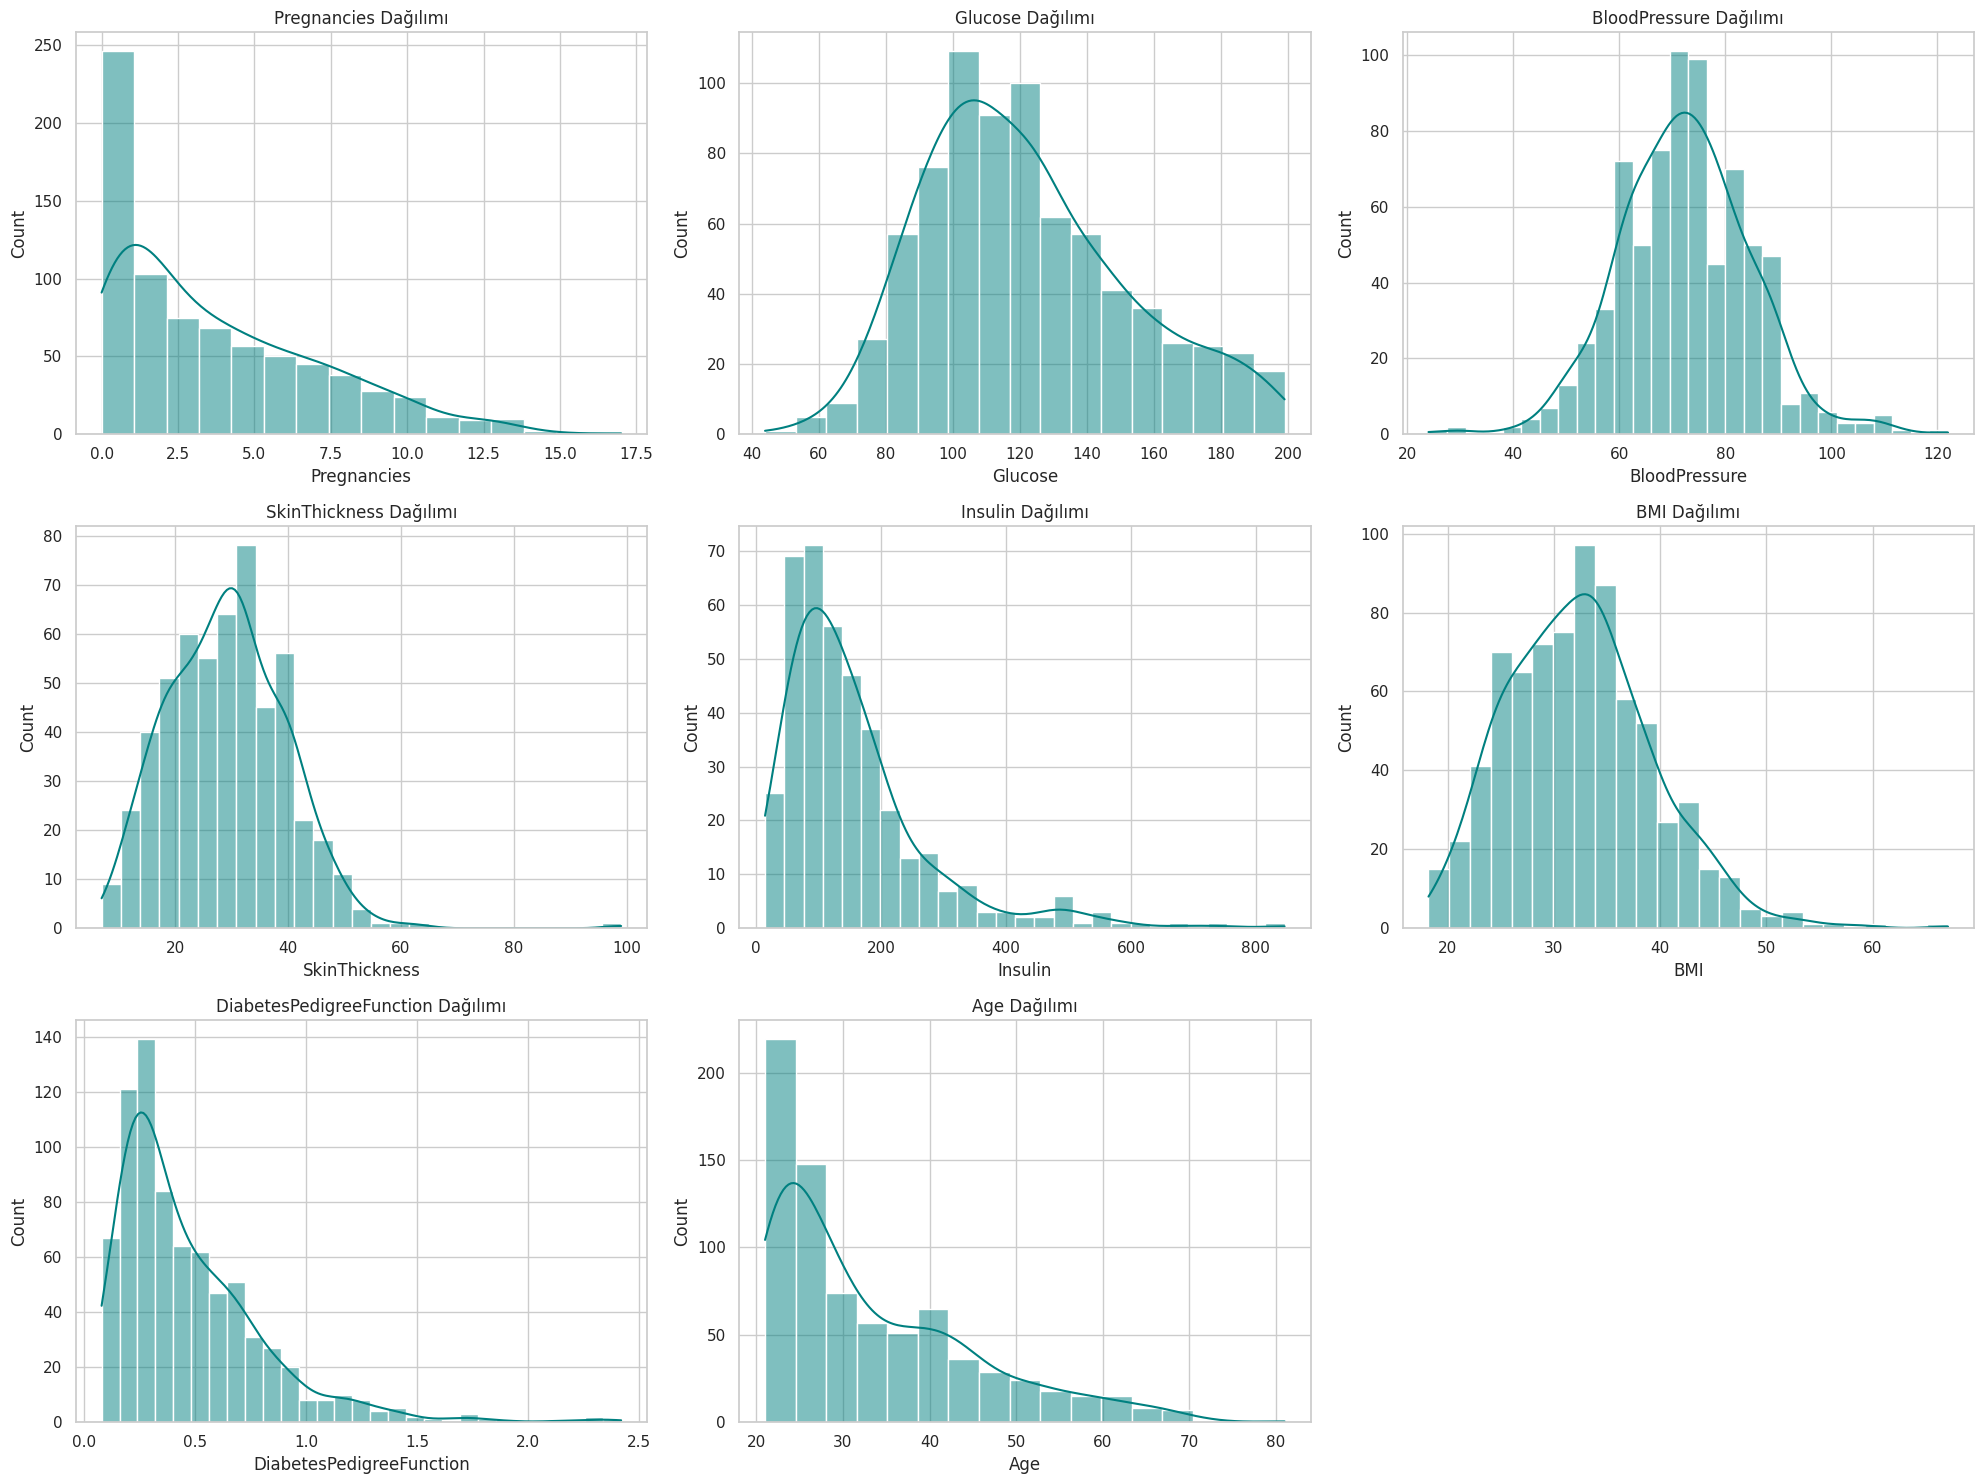

In [19]:
# Sayısal değişkenlerin listesi
features = df.columns.drop('Outcome')

plt.figure(figsize=(20, 15))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color="teal")
    plt.title(f'{col} Dağılımı')
plt.tight_layout()
plt.show()

**Outcome Odaklı Analiz (Boxplot)**

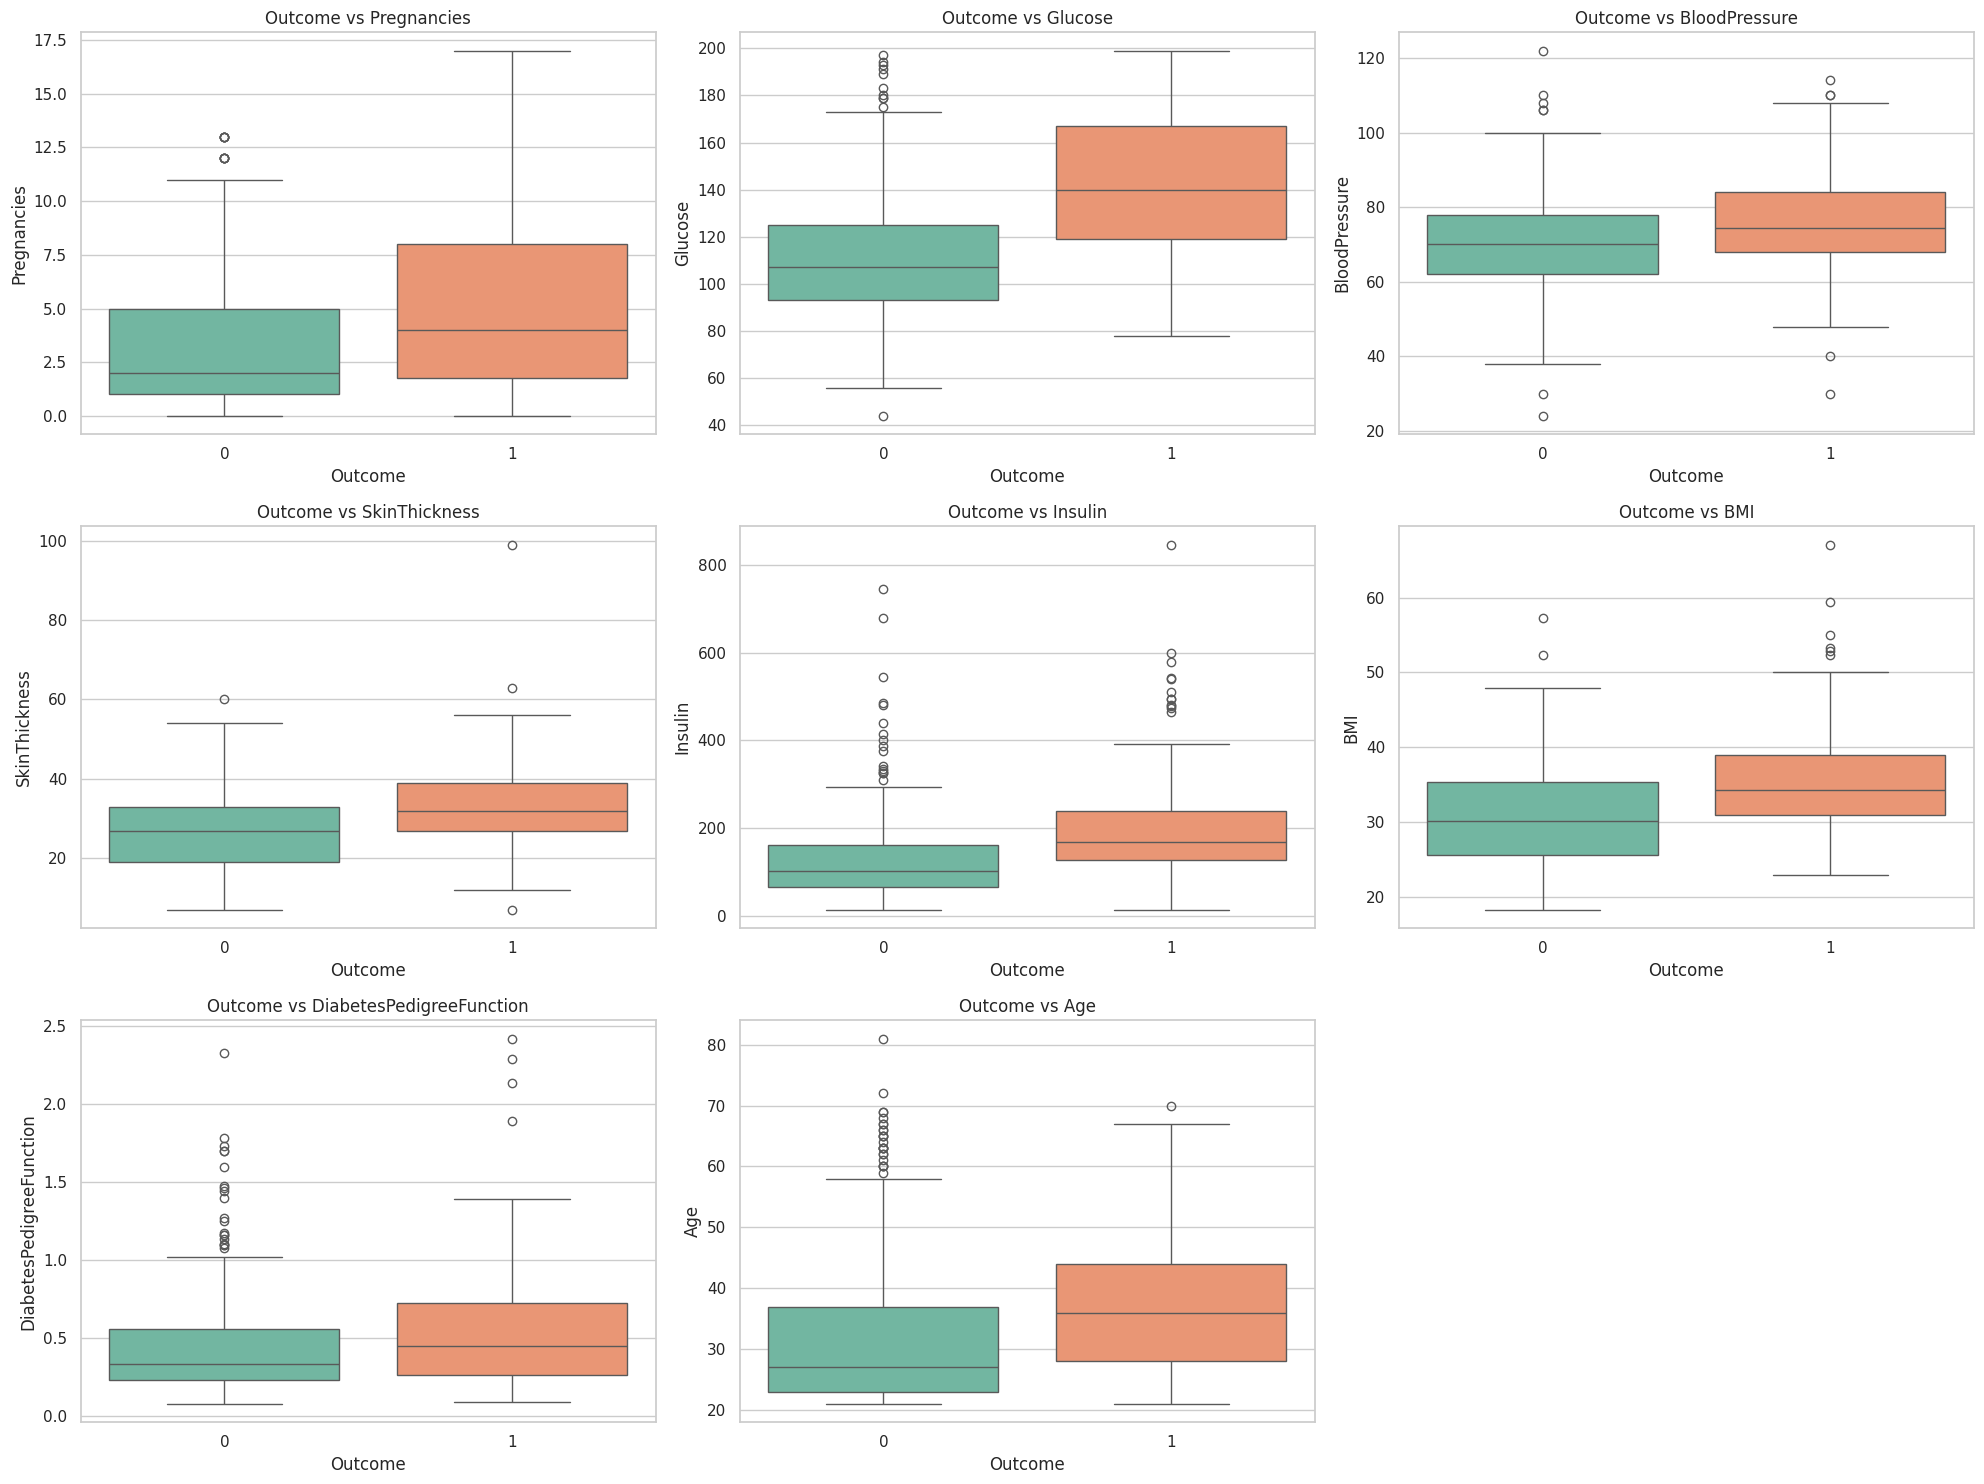

In [20]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
    plt.title(f'Outcome vs {col}')
plt.tight_layout()
plt.show()

**İlişkisel Analiz (Scatter Plot)**

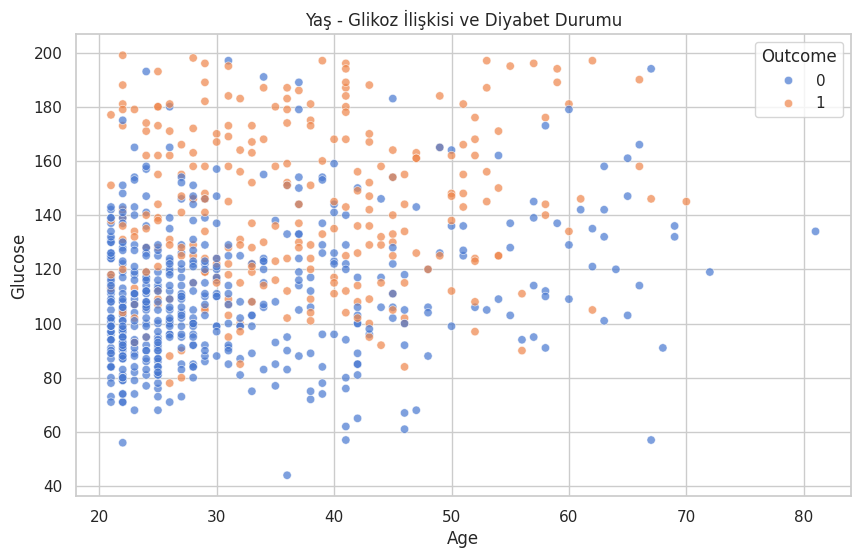

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df, alpha=0.7)
plt.title('Yaş - Glikoz İlişkisi ve Diyabet Durumu')
plt.show()

**Değişkenler Arası Etkileşim (Pair Plot)**

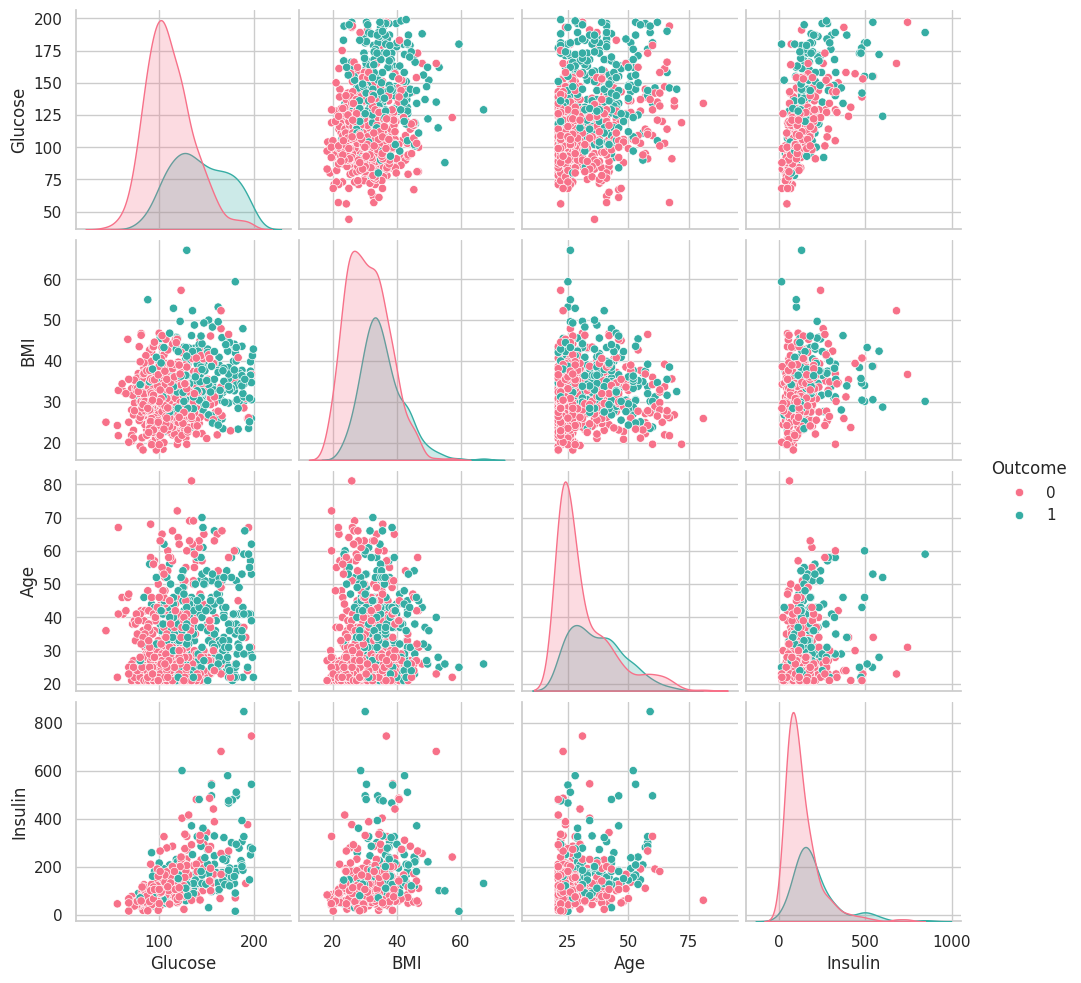

In [22]:
# Sadece en önemli 4-5 değişkeni seçerek pairplot çizdirelim
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin'], palette='husl', diag_kind='kde')
plt.show()

**Çok Değişkenli Aykırı Değer Analizi (Local Outlier Factor)**

In [23]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(df.dropna()) # NaN olmayan değerlerde dene
lof_scores = lof.negative_outlier_factor_

# En düşük skorlara sahip olanlar aykırı değerlerdir
print(np.sort(lof_scores)[0:10])

[-2.59693313 -2.39413252 -1.99003552 -1.79076197 -1.76508397 -1.67698196
 -1.66590066 -1.65883758 -1.61977985 -1.56310344]


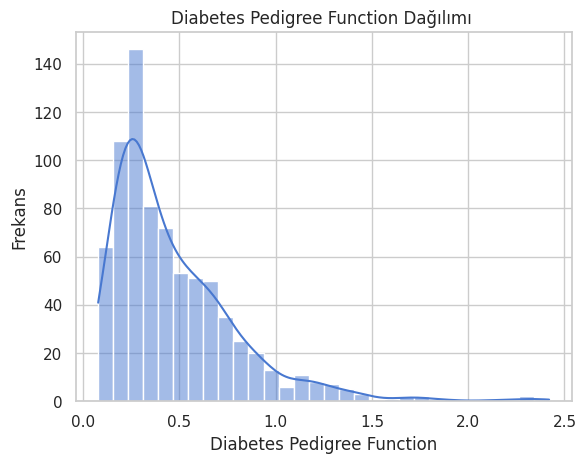

In [24]:
sns.histplot(df["DiabetesPedigreeFunction"] , bins = 30 , kde = True)
plt.title("Diabetes Pedigree Function Dağılımı ")
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Frekans")
plt.show()

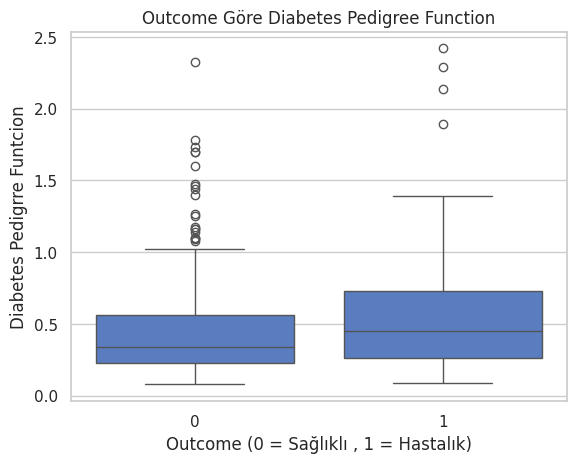

In [25]:
sns.boxplot(x = "Outcome" , y = "DiabetesPedigreeFunction" , data = df)
plt.title("Outcome Göre Diabetes Pedigree Function")
plt.xlabel("Outcome (0 = Sağlıklı , 1 = Hastalık)")
plt.ylabel("Diabetes Pedigrre Funtcion")
plt.show()

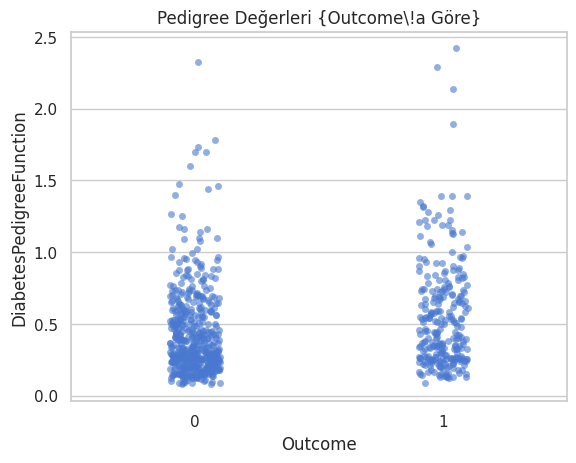

In [26]:
sns.stripplot(x = "Outcome" , y = "DiabetesPedigreeFunction" , data = df , jitter = True , alpha = 0.6)
plt.title("Pedigree Değerleri {Outcome\!a Göre}")
plt.show()

# Preprocessing

In [27]:
X = df.drop("Outcome" , axis = 1)
y = df["Outcome"]

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 17)

In [29]:
# Cell 38'in düzeltilmiş hali:
columns_to_check = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']
medians = {}

for col in columns_to_check:
    # NaN olmayan değerlerin medyanını alıyoruz
    median_value = X_train[col].median() 
    medians[col] = median_value
    
    # 0 yerine NaN değerlerini medyan ile dolduruyoruz
    X_train[col] = X_train[col].fillna(median_value)

for col in columns_to_check:
    # Test setindeki NaN değerlerini, train setinden gelen medyanla dolduruyoruz
    X_test[col] = X_test[col].fillna(medians[col])

In [30]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.856678,121.956026,72.680782,29.539088,141.203583,32.625081,0.467896,33.413681
std,3.355837,30.624597,12.185986,8.490332,89.470780,6.793096,0.326937,11.827949
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,65.000000,25.250000,125.000000,27.625000,0.239250,24.000000
50%,3.000000,117.000000,72.000000,30.000000,125.000000,32.400000,0.364500,29.000000
75%,6.000000,141.000000,80.000000,33.000000,125.000000,36.675000,0.630500,41.000000
max,17.000000,199.000000,114.000000,60.000000,846.000000,67.100000,2.329000,81.000000


In [31]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.798701,120.461039,71.214286,28.863636,138.551948,31.785065,0.487747,32.551948
std,3.434504,29.751725,11.698815,9.948934,73.004436,7.176530,0.348943,11.498248
min,0.000000,56.000000,44.000000,8.000000,14.000000,18.200000,0.088000,21.000000
25%,1.000000,97.000000,64.000000,23.000000,117.000000,26.400000,0.248750,23.000000
50%,3.000000,115.500000,70.000000,30.000000,125.000000,31.750000,0.406500,28.500000
75%,6.000000,139.750000,78.000000,31.750000,140.000000,35.475000,0.599250,40.000000
max,13.000000,197.000000,122.000000,99.000000,540.000000,59.400000,2.420000,66.000000


# Model Evaluation

In [32]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

In [34]:
ada = AdaBoostClassifier()
ada.fit(X_train , y_train)
y_pred = ada.predict(X_test)

In [35]:
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        97
           1       0.74      0.56      0.64        57

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

0.7662337662337663
[[86 11]
 [25 32]]


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
adaboost_params = {
    "n_estimators" : [50 , 70 , 120 , 150 , 200],
    "learning_rate" : [0.001 , 0.01 , 0.1 , 1 , 10]
}

In [38]:
grid = GridSearchCV(estimator = AdaBoostClassifier() , param_grid = adaboost_params , cv = 3 , verbose = 1)

In [39]:
grid.fit(X_train , y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 120, 150, 200]},
             verbose=1)

In [40]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [41]:
ada = AdaBoostClassifier(learning_rate = 1 , n_estimators = 150)

In [42]:
ada.fit(X_train , y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        97
           1       0.76      0.54      0.63        57

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

0.7662337662337663
[[87 10]
 [26 31]]
